In [1]:
# Standard librariees
import numpy as np
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('annual-domestic-sales-and-advert.csv')

   Year  Advertising  Sales
0  1907          608   1016
1  1908          451    921
2  1909          529    934
3  1910          543    976
4  1911          525    930
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
Year           54 non-null int64
Advertising    54 non-null int64
Sales          54 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB
None


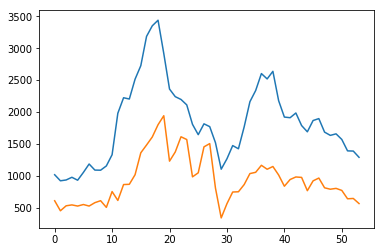

In [3]:
print(df.head())
print(df.info())
df['Sales'].plot() 
df['Advertising'].plot()  
plt.show()

In [4]:
for i in ['Advertising',"Sales"]:
    result = adfuller(df[i],regression='ct', autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
# this means the series are non_stationary

ADF Statistic: -2.302739
p-value: 0.432436
Critical Values:
	1%: -4.157
	5%: -3.504
	10%: -3.182
ADF Statistic: -2.257078
p-value: 0.457821
Critical Values:
	1%: -4.144
	5%: -3.499
	10%: -3.178


In [5]:
# see if the series are I(1)
Y_diff=df.Sales.diff(periods=1)
X_diff=df.Advertising.diff(periods=1)
for i in [X_diff,Y_diff]:
    i.dropna(inplace=True)
    result = adfuller(i,regression="c" ,autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
 

#we see that sales has become stationary after the first difference, 
#but the p_value for advertising is a little greater than 0.5, so the stationarity depends on the significance level we choose 


ADF Statistic: -2.791014
p-value: 0.059569
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
ADF Statistic: -4.471455
p-value: 0.000221
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


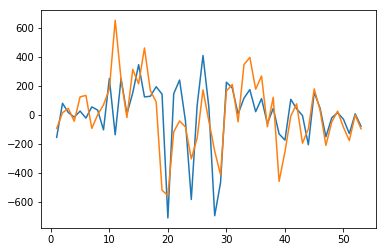


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0727  , p=0.7885  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.0772  , p=0.7812  , df=1
likelihood ratio test: chi2=0.0771  , p=0.7812  , df=1
parameter F test:         F=0.0727  , p=0.7885  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7838  , p=0.1794  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=3.9554  , p=0.1384  , df=2
likelihood ratio test: chi2=3.8095  , p=0.1489  , df=2
parameter F test:         F=1.7838  , p=0.1794  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2666  , p=0.2978  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=4.4183  , p=0.2197  , df=3
likelihood ratio test: chi2=4.2339  , p=0.2373  , df=3
parameter F test:         F=1.2666  , p=0.2978  , df_denom=43, df_num=3


{1: ({'ssr_ftest': (0.0727266819860021, 0.788539809578374, 49.0, 1),
   'ssr_chi2test': (0.07717933598514509, 0.781156915754403, 1),
   'lrtest': (0.07712211711520922, 0.7812359884005196, 1),
   'params_ftest': (0.07272668198599623, 0.7885398095783818, 49.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.7838042942604793, 0.17942249644726146, 46.0, 2),
   'ssr_chi2test': (3.9553921307514974, 0.13838770653253799, 2),
   'lrtest': (3.8095047342209227, 0.14885950056659297, 2),
   'params_ftest': (1.7838042942604857, 0.17942249644726097, 46.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2665831307063193, 0.2978186892897621, 43.0, 3),
   'ssr_chi2test': (4.418313246649951, 0.2196933195142772, 3),
   'lrtest': (4.233886617322355, 0.2372910152443776, 3),
   'params_ftest': (1.2665831307063171, 0.2978186892897621, 43.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [6]:
#check for granger causality, the data is non_stationary and the causality works with statioanry data, so let's use the difference
#ho:no granger causality, meaning that past values of x has no significant effect on the current value of y
plt.plot(X_diff)
plt.plot(Y_diff)
plt.show()
d=pd.DataFrame(Y_diff).join(X_diff)
d.dropna(inplace=True)
smtools.grangercausalitytests(d,maxlag=3, addconst=True)
#  there is no granger causility, as p_value are high

In [8]:
# do a cointagration test
X=df['Advertising']
Y=df["Sales"]    
smtools.coint(X, Y, trend='c', method='aeg',maxlag=1,autolag='aic', return_results=None) 

(-3.585259649415817,
 0.025549314813342376,
 array([-4.11501519, -3.45384388, -3.12544096]))

the null hypothesis of the test is that the series are not cointegarated
As the p_val<0.05, it means that we reject H0, so the series are  cointagrated

In [9]:
# another way to check is the stationarity of residuals
X=sm.tools.tools.add_constant(X, prepend=True, has_constant='skip')
model=sm.OLS(Y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     127.9
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.26e-15
Time:                        22:23:45   Log-Likelihood:                -390.91
No. Observations:                  54   AIC:                             785.8
Df Residuals:                      52   BIC:                             789.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         488.8327    127.439      3.836      0.000     233.108     744.558
Advertising     1.4346      0.127     11.308      0.000       1.180       1.689
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.391
Skew:                          -0.206   Prob(JB):                        0.822
Kurtosis:                       2.936   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
residuals=result.resid

In [11]:
result = adfuller(residuals,regression="c" ,autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#pvalue<0.05, so residuals are stationary, which also means that series are cointagrated

ADF Statistic: -3.062834
p-value: 0.029429
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597


In [12]:
# as we saw the series are cointagrated, so we can estimate long-run relationship between them using OLS
# so the results from the OlS below show that advertsising is a statictically significant variable with of course positive effect 
# the Rsquare is more than 70%
X=sm.tools.tools.add_constant(X, prepend=True, has_constant='skip')
model=sm.OLS(Y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     127.9
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.26e-15
Time:                        22:23:47   Log-Likelihood:                -390.91
No. Observations:                  54   AIC:                             785.8
Df Residuals:                      52   BIC:                             789.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         488.8327    127.439      3.836      0.000     233.108     744.558
Advertising     1.4346      0.127     11.308      0.000       1.180       1.689
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.391
Skew:                          -0.206   Prob(JB):                        0.822
Kurtosis:                       2.936   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""